# Notebook 1 - Generatore di Numeri Pseudocasuali

Questa lezione mira a testare il generatore di numeri casuali che verrà utilizzato per tutta la durata del corso. In particolare si utilizza un generatore Lineare Conguenziale basato sulla procedura RANNYU (RANdom New York University) elaborata tra gli anni '80 e '90. Verranno svolti i seguenti test

   - [  1.1 - Integrali con Metodo Montecarlo ](#ex-1.1) 
   
   - [  1.2 - Verifica del Teorema del Limite Centrale ](#ex-1.2)
   
   - [  1.3 - Esperimento di Buffon](#ex-1.3)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import gamma
import seaborn as sns

<a id="ex-1.1"></a>
## Esercizio 1.1. - Integrali con Metodo Montecarlo
Il primo test condotto consiste nel calcolare degli integrali con metodi Montecarlo. In particolare verrà utilizzato il metodo della media. Secondo questo metodo, l'integrale della funzione è approssimato per $N \to \infty$ da valori della funzione calcolati su punti estratti casualmente. Ovvero

\begin{equation}
    \int_a^b f(x) dx  = \lim_{N \to \infty} \frac{1}{N} \sum_0^N f(x_i) 
\end{equation}
     
Dove $x_i$ sono estratti casualmente nell'intervallo $[a,b]$.

### Data Blocking
In questo esercizio viene anche utilizzato il metodo del Data Blocking, che consiste nel dividere le misure in un numero arbitrario di $N$ blocchi, su ognuno dei quali vengono calcolate media e deviazione standard. Il Data Blocking viene utilizzato per calcolare la deviazione standard sui risultati dell'integrale, cercando di abbattere la correlazione che deriva dall'impossibilità di una totale casualità del generatore. <br>
Le medie parziali calcolate su ogni blocco verranno utilizzate per calcolare una media ed un errore progressivi, che ad ogni passo tengono conto di un blocco in più, permettendo anche di visualizzare la convergenza del metodo.

### Integrale 1

Il primo integrale calcolato è $\langle r \rangle = \int_0^1 rdr = 1/2$. Sono state utilizzate $M = 10000$ estrazioni, divise in $N=100$ blocchi

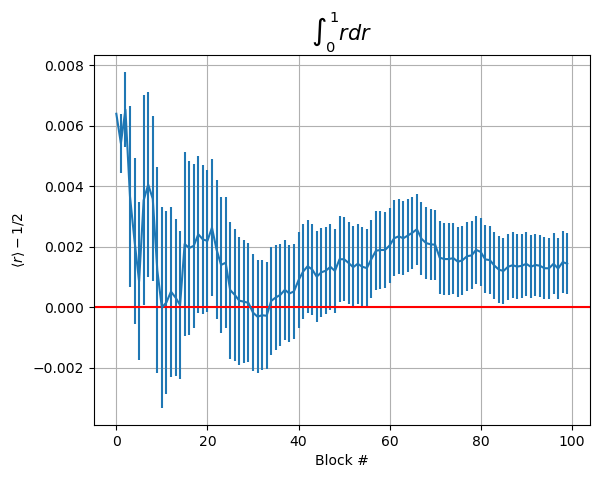

L'ultimo valore calcolato è 0.501438
Il relativo errore è 0.00101189
Il valore si trova a 1.4σ dal valore atteso di 0.5


In [2]:
x, sum_prog, err_prog = np.loadtxt("Exercise01-1/results/results_r.txt", usecols =(0,1,2), unpack = 'true')
plt.errorbar(x, sum_prog-0.5, yerr = err_prog)
plt.xlabel('Block #')
plt.ylabel(r'$\langle r \rangle-1/2$')
plt.title("$\int_0^1 r dr$", fontsize=15)
plt.grid(True)
plt.axhline(y=0, color = 'r', linestyle = '-')

plt.show()

print("L'ultimo valore calcolato è " + str(sum_prog[-1])) 
print("Il relativo errore è " + str(err_prog[-1]))
sigma = (sum_prog[-1] - 0.5)/err_prog[-1]
print("Il valore si trova a " + str(round(sigma,1)) + "\u03C3 dal valore atteso di 0.5")

### Integrale 2

Il primo integrale calcolato è $\sigma_r= \int_0^1 (r-1/2)^2 dr = 1/12$. Sono state utilizzate ancora $M = 10000$ estrazioni, divise in $N=100$ blocchi

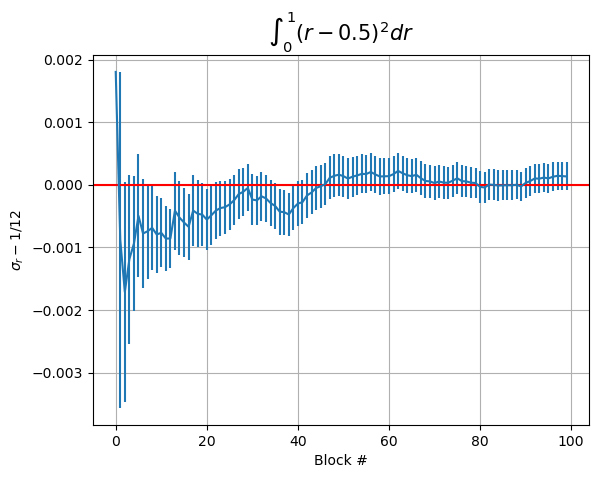

L'ultimo valore calcolato è 0.0834675
Il relativo errore è 0.000223781
Il valore si trova a 0.6σ dal valore atteso di 0.5


In [3]:
x, sum_prog, err_prog = np.loadtxt("Exercise01-1/results/results_r2.txt", usecols =(0,1,2), unpack = 'true')
plt.errorbar(x, sum_prog-1/12, yerr = err_prog)
plt.xlabel('Block #')
plt.ylabel(r'$\sigma_r-1/12$')
plt.title("$\int_0^1 (r-0.5)^2 dr$", fontsize=15)
plt.grid(True)
plt.axhline(y=0, color = 'r', linestyle = '-')

plt.show()

print("L'ultimo valore calcolato è " + str(sum_prog[-1])) 
print("Il relativo errore è " + str(err_prog[-1]))
sigma = (sum_prog[-1] - 1./12.)/err_prog[-1]
print("Il valore si trova a " + str(round(sigma,1)) + "\u03C3 dal valore atteso di 0.5")

### Verifica della legge di decrescita dell'errore
Si utilizzano le quantità calcolate nel secondo integrale per mostrare una proprietà fondamentale dei metodi Montecarlo, ovvero la decrescita dell'errore secondo la legge $\propto \frac{1}{\sqrt{N}}$, indipendentemente dalla dimensione del problema. <br>
Per mostrare ciò si sono utilizzati gli array del punto precedente (eliminando il primo dato (0,0)) e si è effettuato un fit della relazione tra errore e numero di blocchi con la legge $\frac{b}{N^a}$. Il fit è stato effettuato tramite la funzione curve_fit della libreria scipy. <br>
Il valore dei parametri viene riportato

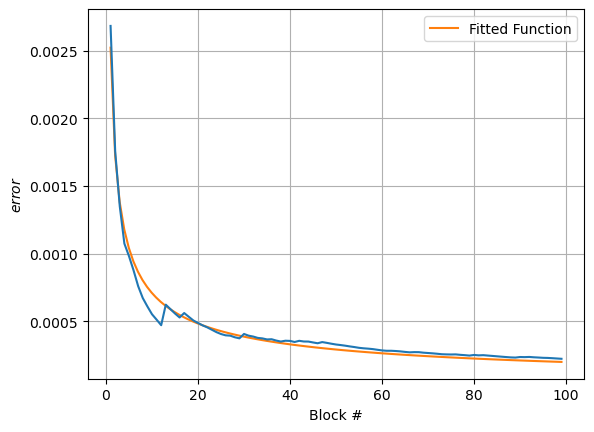

Fitted Parameter (a) (b): -0.550957794104997 0.0025231079589786006


In [4]:
plt.errorbar(x[1:], err_prog[1:])
plt.xlabel('Block #')
plt.ylabel(r'$error$')
plt.grid(True)

# Define the function to fit
def func(x, a, b):
    return b*x**a

# Example data
x_data = x[1:]
y_data = err_prog[1:]


# Perform the curve fitting
params, _ = curve_fit(func, x_data, y_data)
fitted_a, fitted_b = params

# Generate points for the fitted function
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, fitted_a, fitted_b)

# Plot the data and the fitted function
plt.plot(x_fit, y_fit, label='Fitted Function')

plt.legend()

# Show the plot
plt.show()

# Print the fitted parameter
print("Fitted Parameter (a) (b):", fitted_a, fitted_b)


plt.show()

### Calcolo del $\chi^2$
Per verificare infine che la distribuzione sia effettivamente uniforme come ci si aspetta, è stato effettuato un test del $\chi^2$. <br>
Il test è stato svolto dividendo l'intervallo \[0,1) in $N=100$ sottointervalli ed estraendo $M=10000$ numeri pseudocasuali. Se la distribuzione è effettivamente uniforme ci si aspetta che ogni intervallo sia popolato da circa $M/N$ numeri. <br>
Dalla statistica del $\chi^2$ si ha:


\begin{equation}
    \chi^2 = \sum_0^N \frac{(n_i - M/N)^2}{M/N}
\end{equation}

Ci si aspetta dunque di trovare $\chi^2 \approx 100$ se la distribuzione è effettivamente uniforme. <br>
Questo test è stato ripetuto nella maniera descritta per $10000$ volte e il grafico riporta la distribuzione dei valori di $\chi^2$. Questa è stata fittata con quella teorica, la cui espressione è:

\begin{equation}
    f(x, N, k) = N \frac{x^{k/2-1}e^{-x/2}}{2^{k/2}\Gamma \left(\frac{k}{2} \right)}
\end{equation}

I parametri calcolati sono riportati, in particolare si nota che il valore del parametro risulta $k \approx 99$, in accordo con il fatto che tale parametro rappresenti il numero di gradi di libertà.

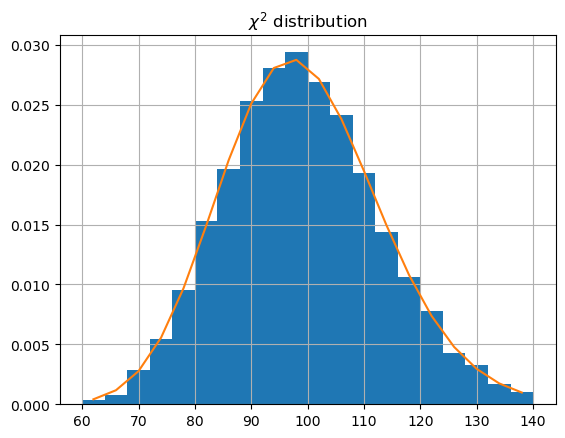

Optimized param k, N:
[99.13888229  1.00787655]
Param uncertaintes:
[1.03152786e-02 2.68694110e-05]


In [5]:
def f(x,k,N):
    return N*(x**(k/2-1)*np.exp(-x/2))/(2**(k/2)*gamma(k/2))

n_bins = 20
chi = np.loadtxt("Exercise01-1/results/results_chi2.txt", unpack = 'true')

n, bins, platches = plt.hist(chi, n_bins, range=(60,140), density=1)
plt.title("$\chi^2$ distribution")
plt.grid(True)

bins = bins + 80/(n_bins*2)
bins = np.delete(bins, n_bins)
p_fit, p_cov= curve_fit(f, bins, n, bounds=([50,0],[150,2]))    #p_opt è un array con i parametri, p_cov la matrice di covarianza
y_fit = f(bins, p_fit[0], p_fit[1])
plt.plot(bins, y_fit)
plt.show()

print("Optimized param k, N:")
print(p_fit)
print("Param uncertaintes:")
print(np.diagonal(p_cov))           #gli elementi sulla diagonale sono le devstd, fuori sono le covarianze


<a id="ex-1.2"></a>
## Esercizio 1.2 - Teorema del Limite Centrale
In questo esercizio si è innanzitutto esteso il GNP anche ad altre distribuzioni, in particolare <br>

- Esponenziale: $p(x) = \lambda \exp(-\lambda x)$ con $x \in [0, \infty)$  e nel nostro caso $\lambda = 1$
- Cauchy-Lorentz: $p(x) = \frac{1}{\pi} \frac{\Gamma}{(x-\mu)^2 + \Gamma^2}$ con $x \in (- \infty, \infty)$ e nel nostro caso $\mu = 0, \Gamma = 1$

Queste distribuzioni sono state implementate attraverso il metodo dell'inversione della cumulativa. Questo metodo si basa sul fatto che, data $x$ variabile casuale continua, se la sua funzione di ripartizione $y = F(x)$ è strettamente crescente, allora $y$ è distribuito uniformemente tra $[F(x_{min}), F(x_{max})]$. <br>
Quindi se è possibile invertire analiticamente la funzione cumulativa in $x=F^{-1}(y)$, estraendo le $y$ uniformemente è possibile ottenere delle $x$ distribuite secondo la distribuzione cercata. <br>
Per le due distribuzioni fornite è possibile invertire la cumulativa, dunque attraverso questo metodo sono state aggiunte alla classe `Random`.

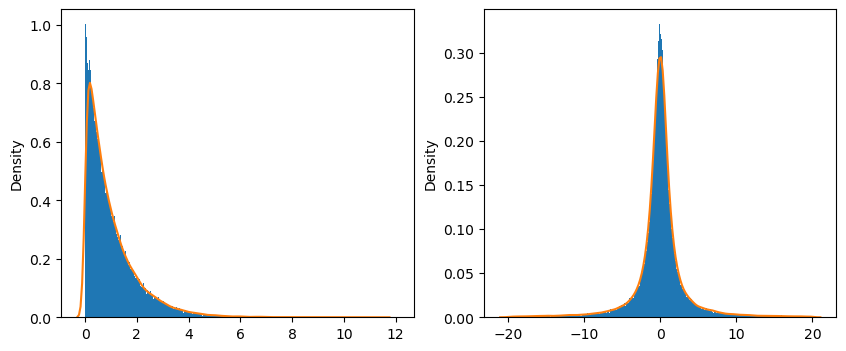

In [6]:
with open("Exercise01-2/results/distributions.txt") as f:
    lines = f.readlines()
    exp = [float(line.split()[0]) for line in lines]
    lor = [float(line.split()[1]) for line in lines]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # Per mostrare fianco a fianco

axes[0].hist(exp, 500, density=True)
sns.kdeplot(np.random.exponential(1, size=100000), ax=axes[0])
axes[1].hist(lor, 500, range=[-20, 20], density=True)
s = np.random.standard_cauchy(100000)
s = s[(s > -20) & (s < 20)]  
sns.kdeplot(s, ax=axes[1])

plt.show()


### Teorema del Limite Centrale
Le distribuzioni ora presenti all'interno della classe `Random` sono state utilizzate per verificare il teorema del Limite Centrale, il quale asserisce che, indipendentemente da quale distribuzione seguano certe variabili, certe quantità (come la somma di $N$ elementi o la media) tendono a seguire una distribuzione Gaussiana per $N \to \infty$. L'unico vincolo è che la distribuzione di partenza abbia media e varianza finite, condizione verificata per tutte e tre le distribuzioni utilizzate. <br>
In questo esercizio sono state generati $N \cdot 10^4$ numeri secondo le distribuzioni uniforme, esponenziale e lorentziana, dove $N = 1, 2, 10, 100$. Quindi le medie dei primi $N$ elementi sono state calcolate attraverso $S_N = \frac{1}{N} \sum_1^N x_i$, dove $x_i$ viene estratto con la rispettiva distribuzione.

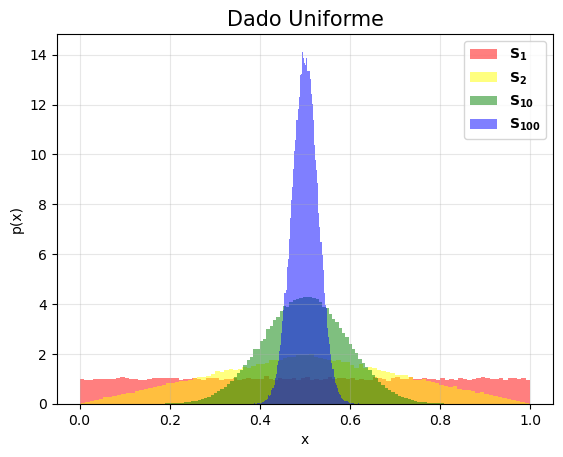

In [2]:
bins = 100
with open("Exercise01-2/results/uniform.txt") as f:
    lines = f.readlines()
    S_1 = [float(line.split()[0]) for line in lines]
    S_2 = [float(line.split()[1]) for line in lines]
    S_10 = [float(line.split()[2]) for line in lines]
    S_100 = [float(line.split()[3]) for line in lines]

plt.hist(S_1, bins, color = 'red', density = 'true', alpha = 0.5, label = '$\mathbf{S_{1}}$')
plt.hist(S_2, bins, color = 'yellow', density = 'true', alpha = 0.5, label = '$\mathbf{S_{2}}$')
plt.hist(S_10, bins, color = 'green', density = 'true', alpha = 0.5, label = '$\mathbf{S_{10}}$')
plt.hist(S_100, bins, color = 'blue', density = 'true', alpha = 0.5, label = '$\mathbf{S_{100}}$')

plt.xlabel("x", fontsize = 10)
plt.ylabel('p(x)', fontsize = 10)
plt.title("Dado Uniforme", fontsize = 15)
plt.grid('true', alpha = 0.3)
plt.legend()
plt.show()

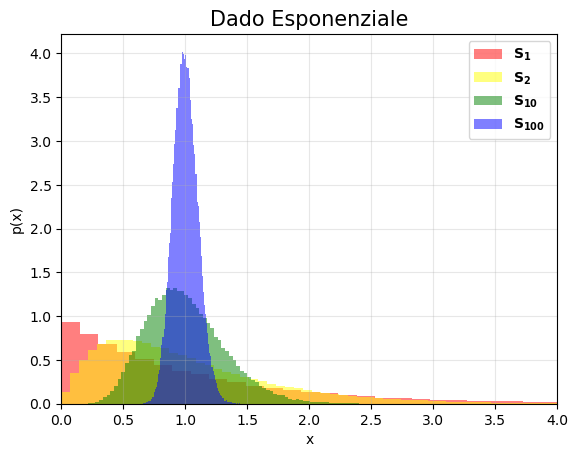

In [3]:
with open("Exercise01-2/results/exponential.txt") as f:
    lines = f.readlines()
    S_1 = [float(line.split()[0]) for line in lines]
    S_2 = [float(line.split()[1]) for line in lines]
    S_10 = [float(line.split()[2]) for line in lines]
    S_100 = [float(line.split()[3]) for line in lines]

plt.hist(S_1, bins, color = 'red', density = 'true', alpha = 0.5, label = '$\mathbf{S_{1}}$')
plt.hist(S_2, bins, color = 'yellow', density = 'true', alpha = 0.5, label = '$\mathbf{S_{2}}$')
plt.hist(S_10, bins, color = 'green', density = 'true', alpha = 0.5, label = '$\mathbf{S_{10}}$')
plt.hist(S_100, bins, color = 'blue', density = 'true', alpha = 0.5, label = '$\mathbf{S_{100}}$')

plt.xlabel("x", fontsize = 10)
plt.ylabel('p(x)', fontsize = 10)
plt.title("Dado Esponenziale", fontsize = 15)
plt.grid('true', alpha = 0.3)
plt.xlim(0, 4)
plt.legend()
plt.show()

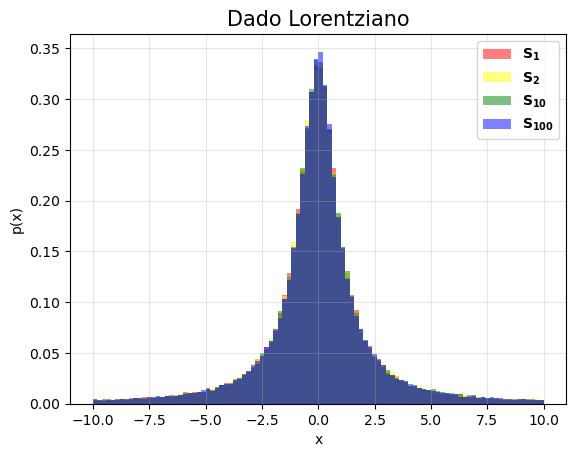

In [4]:
with open("Exercise01-2/results/lorentzian.txt") as f:
    lines = f.readlines()
    S_1 = [float(line.split()[0]) for line in lines]
    S_2 = [float(line.split()[1]) for line in lines]
    S_10 = [float(line.split()[2]) for line in lines]
    S_100 = [float(line.split()[3]) for line in lines]

plt.hist(S_1, bins, range = (-10,+10), color = 'red', density = 'true', alpha = 0.5, label = '$\mathbf{S_{1}}$')
plt.hist(S_2, bins, range = (-10,+10), color = 'yellow', density = 'true', alpha = 0.5, label = '$\mathbf{S_{2}}$')
plt.hist(S_10, bins, range = (-10,+10), color = 'green', density = 'true', alpha = 0.5, label = '$\mathbf{S_{10}}$')
plt.hist(S_100, bins, range = (-10,+10), color = 'blue', density = 'true', alpha = 0.5, label = '$\mathbf{S_{100}}$')

plt.xlabel("x", fontsize = 10)
plt.ylabel('p(x)', fontsize = 10)
plt.title("Dado Lorentziano", fontsize = 15)
plt.grid('true', alpha = 0.3)
plt.legend()
plt.show()

Si nota quindi che le distribuzioni uniforme e esponenziale convergono ad una Gaussiana, e questo è coerente con il Teorema del Limite Centrale in quanto hanno varianza finita. <br> La Lorentziana invece non ha varianza finita (motivo per il quale si è dovuto aggiungere `range = (-10,10)` sull'asse). Tuttavia la Lorentziana è una distribuzione <b> stabile </b> ovvero invariante sotto convoluzioni:

\begin{equation}
     p(a_1x + b_1) * p(a_2x + b_2) = \int_{-\infty}^{\infty} p(a_1(y-x) + b_1)p(a_2x + b_2)dx = p(ay+b)
\end{equation}

Per il teorema di convergenza di Levy e Khintchine, solo una distribuzione di probabilità stabile può costituire una distribuzione limite per la somma di variabili distribuite casualmente secondo altre distribuzioni. Essendo sia la Gaussiana che la Lorentziana stabili, esse possono costituire limite, e dunque si mostra che la Lorentziana tende a sé stessa.

<a id="ex-1.3"></a>
## Esercizio 1.3 - Esperimento di Buffon

Questo ultimo esercizio si è voluto simulare l'esperimento di Buffon per il calcolo del valore di $\pi$. <br>
In questo esperimento un bastoncino di lunghezza $L=1$ viene lanciato su una griglia con linee orizzontali a distanza $d=5$. La probabilità che il bastoncino intersechi una delle linee è $P = 2L/\pi d$. Stimando la probabilità come $P \approx N_{hit}/N_{tot}$ si ottiene la seguente formula:

\begin{equation}
    \pi = \lim_{N \to \infty} \frac{2 L N_{tot}}{N_{hit} d}
\end{equation}

Per simulare numericamente l'esperimento è stato innanzitutto ridotto ad un asse $ [0,d]$, ed è stato estratta uniformemente la coordinata $y$ nell'intervallo $[0,d]$. Questo è reso possibile dal fatto che la coordinata parallela alla grigia non ha alcuna rilevanza nell'esperimento, essendo quest'ultimo invariante per traslazioni su quella coordinata.<br>
Successivamente è stato estratto un angolo in maniera uniforme nell'intervallo $[0,2\pi]$, nella maniera che verrà spiegata successivamente, e l'altra estremità del bastoncino (solo nella sua coordinata verticale) è stata calcolata come $y_2 = y_1 + \sin(\theta)$ <br>
A questo punto è stato verificato se il bastoncino intersecasse o meno i confini della griglia, andando ad incrementare due contatori `hit` e `tot`. <br>
Per un singolo valore di $\pi$ l'esperimento è stato ripetuto $100$ volte, e in più è stato utilizzato il metodo di data blocking, con $N=100$ blocchi ognuno contenente $L=100$ valori di $\pi$

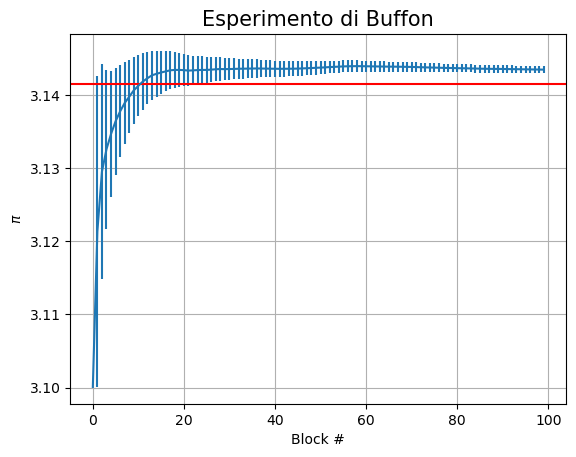

In [10]:
x, sum_prog, err_prog = np.loadtxt("Exercise01-3/results/results_pi.txt", usecols =(0,1,2), unpack = 'true')
plt.errorbar(x, sum_prog, yerr = err_prog)
plt.xlabel('Block #')
plt.ylabel('$\pi$')
plt.title("Esperimento di Buffon", fontsize=15)
plt.grid(True)
plt.axhline(y=np.pi, color = 'r', linestyle = '-')

plt.show()

### Generatore casuale \[0, 2$\pi$ \]
Essendo l'esperimento mirato a conoscere il valore di $\pi$, è concettualmente errato utilizzarlo già all'interno del calcolo. Per poter quindi generare uniformemente un angolo, è stato utilizzato un metodo Accept-Reject implementato nel modo seguente. <br>
Sono stati dapprima generati punti uniformemente distribuiti in un quadrato $[-1,1]\times[-1,1]$, che venivano accettati solamente se giacenti all'interno del cerchio unitario. Una volta accettato il punto, l'angolo corrispondente è:

\begin{equation}
\theta = 
    \begin{cases}
        \arccos{\frac{x}{\sqrt{x^2+y^2}}} & \text{se } y > 0 \\
        \pi + \arccos{\frac{x}{\sqrt{x^2+y^2}}} & \text{se } y < 0 \\
    \end{cases}
\end{equation}

Nei grafici riportati successivamente viene mostrato il riempimento progressivo della circonferenza unitaria con gli angoli estratti, e risulta verosimile che tale riempimento sia uniforme.

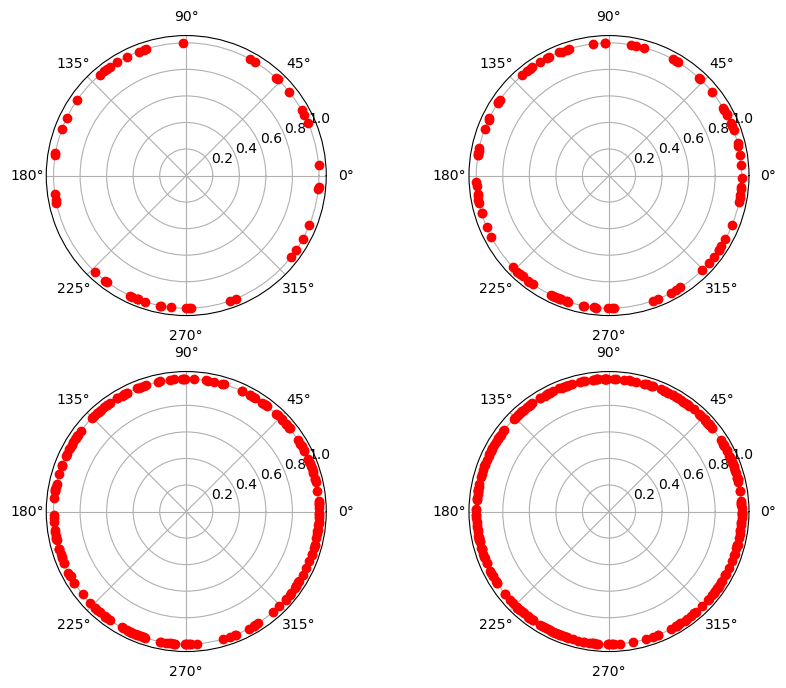

In [11]:
angles = np.loadtxt("Exercise01-3/results/results_angle.txt")
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(2, 2, 1, projection='polar')
ax1.plot(angles[:50], np.ones_like(angles[:50]), 'ro')

ax2 = fig.add_subplot(2, 2, 2, projection='polar')
ax2.plot(angles[:100], np.ones_like(angles[:100]), 'ro')

ax3 = fig.add_subplot(2, 2, 3, projection='polar')
ax3.plot(angles[:200], np.ones_like(angles[:200]), 'ro')

ax4 = fig.add_subplot(2, 2, 4, projection='polar')
ax4.plot(angles[:300], np.ones_like(angles[:300]), 'ro')

plt.show()